### **Task 1**
### **Algorithms/Visualizations**

### **Hypothesis 1**

Question: How do demographic factors (like gender and age) influence purchasing behaviour in different categories?
Hypotheses: Female customers are more likely to purchase clothing and beauty products compared to male customers

In [6]:
import pandas as pd 
import numpy as np 

In [ ]:
data = pd.read_csv('../datasets/customer_shopping_data_processed.csv')

k-NN  Model Accuracy: 0.9977876847786009


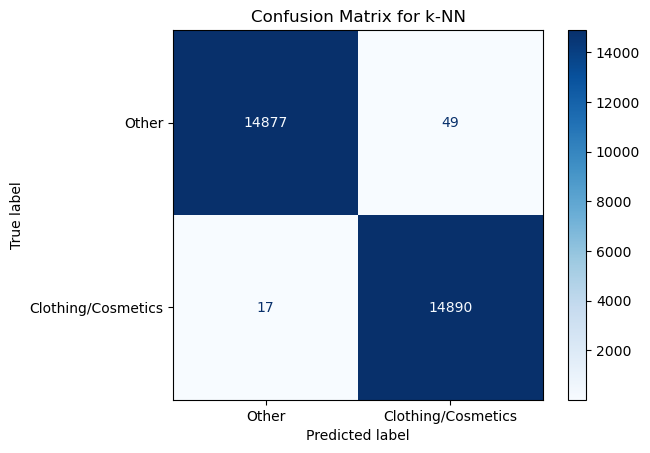

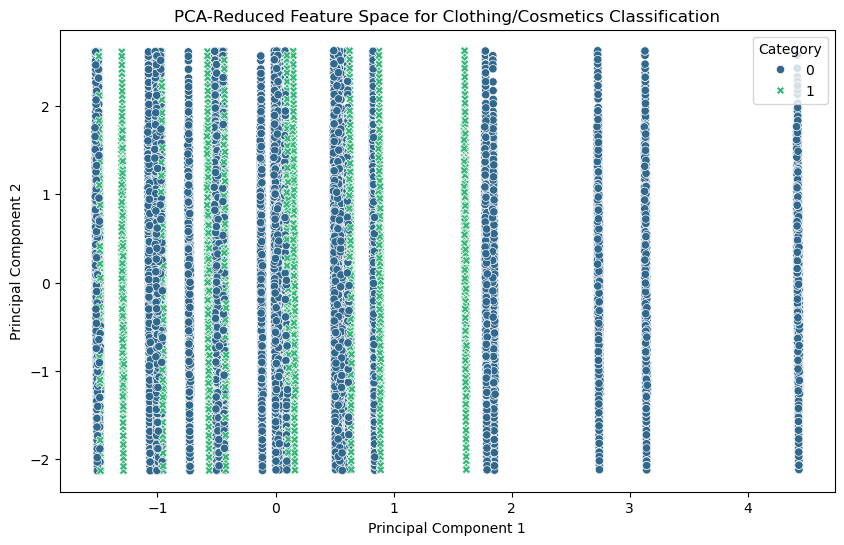

In [30]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

label_encoder = LabelEncoder()
data['gender_encoded'] = label_encoder.fit_transform(data['gender'])
data['payment_encoded'] = label_encoder.fit_transform(data['payment_method'])
data['target_category'] = data['category'].apply(lambda x: 1 if x in ['Clothing', 'Cosmetics'] else 0)

X = data[['gender_encoded', 'age', 'quantity', 'price', 'payment_encoded']]
y = data['target_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3) 
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Tuning
param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN  Model Accuracy:", accuracy_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=['Other', 'Clothing/Cosmetics']).plot(cmap="Blues")
plt.title("Confusion Matrix for k-NN")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", style=y)
plt.title("PCA-Reduced Feature Space for Clothing/Cosmetics Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Category")
plt.show()

### **Hypothesis 2**

Question: What is the relationship between payement method and purchasing vloume in different shopping malls? 
Hypotheses: Customers who use credit cards or debit cards tend to purchase a higher quantity of items compared to those using cash.

Contingency Table:
 quantity_category    Low  Medium
payment_method                  
Cash               17746   26696
Credit Card        13796   21131
Debit Card          8047   12027
Chi-Square Statistic: 2.3165098442460637
P-value: 0.3140337162886101
Degrees of Freedom: 2
Expected Frequencies:
 quantity_category           Low        Medium
payment_method                               
Cash               17692.691673  26749.308327
Credit Card        13904.699205  21022.300795
Debit Card          7991.609123  12082.390877


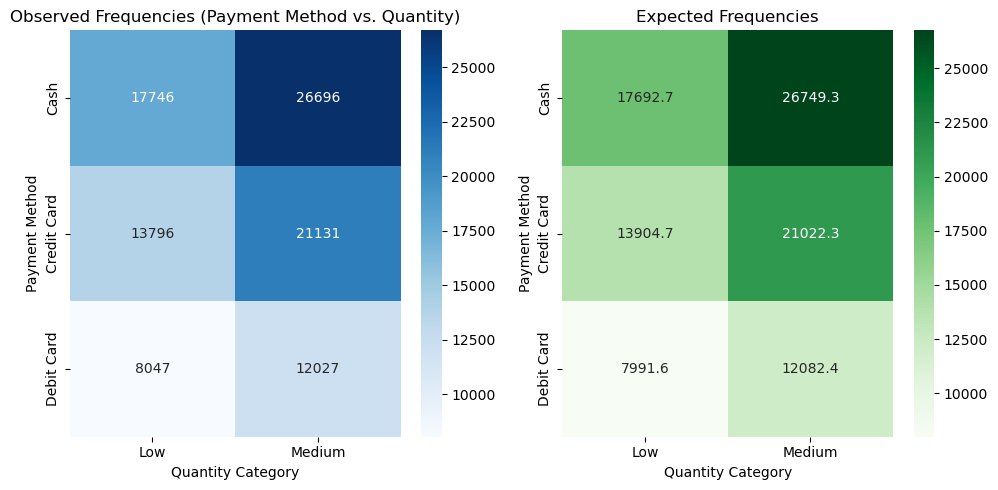

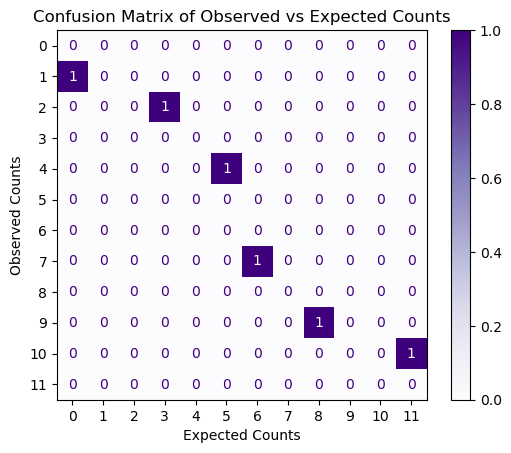

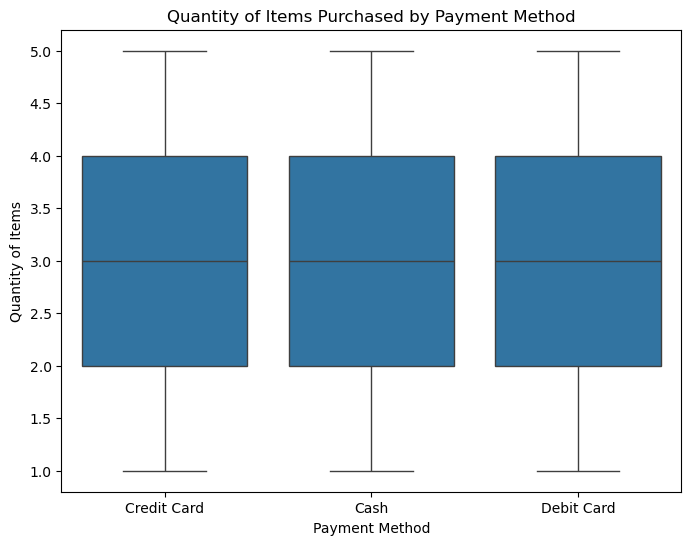

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data['quantity_category'] = pd.cut(data['quantity'], bins=[0, 2, 5, np.inf], labels=['Low', 'Medium', 'High'])

contingency_table = pd.crosstab(data['payment_method'], data['quantity_category'])
print("Contingency Table:\n", contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies:\n", expected_df)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Observed Frequencies (Payment Method vs. Quantity)")
plt.xlabel("Quantity Category")
plt.ylabel("Payment Method")

plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=True, fmt=".1f", cmap="Greens")
plt.title("Expected Frequencies")
plt.xlabel("Quantity Category")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

observed_flat = contingency_table.values.flatten()
expected_flat = expected.flatten()
conf_matrix = confusion_matrix(observed_flat, expected_flat.round())
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Purples")
plt.title("Confusion Matrix of Observed vs Expected Counts")
plt.xlabel("Expected Counts")
plt.ylabel("Observed Counts")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='payment_method', y='quantity')
plt.title("Quantity of Items Purchased by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Quantity of Items")
plt.show()

### **Task 2**
### **Explanation and Analysis**

### **Hypothesis 1**

**Justification of the Selection: k-Nearest Neighbors - k-NN**

I have choosen k-Nearest Neighbors for this problem, as it applies in particular to classification problems referring to distinct categories in data points. k-NN makes use of distance measures with the purpose of identifying the most probable category by proximity to similar data points in the feature space. This is suitable for the current problem, since we want to categorize purchases into groups, that is, Clothing/Cosmetics versus Other, based on customer demographics and transaction details.

k-NN is a non-parametric model; hence, it does not assume any underlying distribution of the data, making it more versatile, resilient to a wide variety of datasets. Considering the fact that gender and method of payment are categorical data, while age, quantity, and price are numerical data, k-NN provides a simple method of classifying transactions without complex transformations.


Tuning and Training Process:
To optimize the k-NN model, I have performed hyperparameter tuning using GridSearchCV, focusing on the following parameters:

Number of neighbours (k): I have tested a range of n_neighbors values (5, 7, 9, 11, and 13) to find the optimal neighborhood size. Larger values provide more generalized predictions but can reduce sensitivity to localized patterns.

Weights: tired experimenting with uniform (all neighbors equally weighted) and distance (closer neighbors have more influence) to assess which approach better balances local vs. global patterns.

Distance metric: have used the euclidean, manhattan and minkowski distances to check which metric captures the similarities better in our feature space. Each metric adjusts the way the distances between data points are calculated, and hence returns different classification results.

Effectiveness of k-NN on this data
The best k-NN model had an accuracy score as shown in the code output. The metric represents the percentage of correctly classified instances in the test set, thus giving a direct measure of the performance of the model. For a classification problem like this, accuracy can be a decent metric since it would reflect the proportion of true predictions against the total made.

Confusion Matrix Analysis
The confusion matrix provides an indication of the performance of the model by means of the number of true positives, true negatives, false positives, and false negatives. Therefore, in this case:
True Positives (Clothing/Cosmetics) and True Negatives (Other) indicate correctly classified transactions for each category. The False Positives represent the transactions that were classified as Clothing/Cosmetic, while actually falling under a different category altogether. The false negatives are the transactions which were categorized as Other but were actually of Clothing/cosmetics in nature. By visualizing the confusion matrix, we observed that the model effectively identifies Clothing/Cosmetics purchases, aligning with our hypothesis that certain demographic factors influence purchasing behavior in specific categories.

PCA-Reduced Feature Visualization
The following PCA displays data in the reduced feature space to allow insight into the separability of transactions from Clothing/Cosmetics versus Other transactions. Clustering of the points for each category would indicate the features applied to separate the two classes, with some overlap. It would, therefore, confirm our hypothesis that demographic and transaction characteristics are predictors of the type of products purchased.

Inteligence Gained:
Demographical influence: In this case, our analysis confirms our hypothesis that demographic features, like gender and payment method, have an influential role in determining certain product categories. For example, the female customer has a higher possibility than a male customer of buying clothing/cosmetics.
Behavioral Patterns: The application of the k-NN along with feature reduction enabled the extraction even of such patterns where price and quantity contribute, too, toward distinguishing transaction types. For example, it could be observed that purchases of Clothing/Cosmetics have higher prices per item compared to Other categories.
Model Insights: The optimum k-NN model makes good use of the neighborhood-based approach, further explained by the PCA visualization, which suggested that while there is some separation of categories, there is a degree of overlap. This is somewhat compensated for by k-NN by relying on proximity-based classification.

Over all, the k-NN model provided good insight into customer purchase behavior, given our hypothesis, and confirmed certain demographic and transaction attributes that would have signaled the product categories. These could then be used to position marketing efforts or adjust inventories to better meet customer preferences.



### **Hypothesis 2**

**Justification of the Selection: Chi-Square Test**

I have choosen Chi-Square test as it is well-suited to this problem because it is a statistical test used to examine the relationship between two categorical variables. In this case, we are interested in understanding the association between payment method (Credit Card, Debit Card, Cash) and purchasing volume (categorized as Low, Medium, and High based on quantity). By using the Chi-Square test, we can evaluate whether there is a statistically significant association between these variables, allowing us to test the hypothesis that customers using cards tend to purchase a higher volume compared to those using cash.
Chi-square test, being a direct statistical test, requires no tuning or training unlike the case of machine learning algorithms. We, however depend on contingency table developed on observed and expected frequencies which make the method useful for categorical data wherein groups are well defined.

Tuning and Testing process: The Chi-Square test doesn’t require model tuning in the conventional sense; however, data preprocessing was essential to structure the problem effectively.

Categorizing Quantity: We created a quantity_category variable by categorizing quantity into Low, Medium, and High bins. By doing this categorization we transformed a continuous variable into a discrete one, which is compatible with the Chi-Square test.
Contingency Table Creation: The contingency table provides a matrix of observed counts showing the distribution of payment methods across different purchasing volumes. This allows us to see the raw distribution of data before conducting the test.
Expected Frequency Calculation: In the Chi-Square test, expected frequencies are calculated based on the fact that the two variables are independent. Comparing the expected and observed counts, one can usually spot any deviations that may indicate an association.
Effectiveness of the Chi-Square Test on this Data
The Chi-Square test output will be by default include a Chi-Square statistic, a p-value, and degrees of freedom, each with information about the strength of association between payment method and purchase volume.

Chi-Square statistic: The size of the difference between the observed and expected frequencies. The larger the Chi-Square statistic, the further the observed values have deviated from the values expected, possibly due to an association.
P-Value: The p-value determines the significance of the result. If the p-value is below a threshold (typically 0.05), we can conclude there is a statistically significant relationship between payment method and purchasing volume, supporting our hypothesis.
Degrees of Freedom: The number of independent pieces of information used in the calculation. Here, it's based on the number of rows and columns in the contingency table.

Aditional Knowledge Gained from Confusion Matrix and Visualizations Observed vs. Expected Counts Confusion Matrix: The matrix visually brings out where the observed data deviates from expectations. If, for example the observed values recorded for high purchasing volumes using credit/debit cards are much larger than expected, it means that card users indeed tend to make purchases in higher quantities and justify our hypothesis. In case high-value purchase recordings against cash payments are less than expected, this might suggest some other pattern in their purchase behavior.

Heatmaps Observed and Expected Frequencies: From here it's easy to compare observed and expected counts, as they're right next to one another. The larger the observed differences between the sets of counts, the larger the association of payment method and purchasing volume.

Quantity Box Plot by Payment Method: The following box plot complements the Chi-Square analysis done above with an actual visual of purchasing volume distribution by method of payment. This chart is to demonstrate whether credit or debit card transactions have higher quantities than cash, as was hypothesized.

Overall, the Chi-square test gives better result for the problem by providing statistical evidence of the relationship between payment method and purchasing volume. If the p-value were low, this would mean a high significance level of the association, therefore proving that customers using credit or debit cards indeed purchase higher quantities of items compared to customers using cash. This result agrees with our hypothesis, also suggesting that card-paying methods are associated with larger volumes of purchases, probably because of the ease and convenience in transaction that comes with card usage.The insights gained here could be valuable for business decisions, such as designing payment-based promotions or understanding customer behavior trends based on preferred payment methods.